Submitted by: Pratham Agarwala <br>
Submitted for internship at: Customaise Analytics Private Limited

In [1]:
import numpy as np              # scientific computation
import pandas as pd             # loading dataset file
import matplotlib.pyplot as plt # visualization
import seaborn as sns

In [2]:
df = pd.read_csv("hyderabad-salaried-employees.csv")

In [3]:
print(df.shape)    # shape of data 

(28846, 11)


In [4]:
print(df.ndim)     # number of dimensions of data 

2


In [5]:
print(df.isna().sum())    #sum for all na values

candidateName               4
companyName                40
designation              4629
emailAddress               12
experienceMas               0
locationCurrentMas          0
qualificationMas         4875
qualificationMas2       13397
salary (in lacs INR)        0
tel_Other                   0
Category                    0
dtype: int64


In [6]:
#df1 = df['qualificationMas']
#df2 = df['qualificationMas2']
#df['qualificationMas'] = df1.combine_first(df2)

# filling null values in 'qualifcationMas' using values from 'qualificationMas2' and then dropping the latter

df['qualificationMas'] = df['qualificationMas'].fillna(df['qualificationMas2'])   # merging
df = df.drop(['qualificationMas2'], axis=1)                                       # dropping

In [7]:
# dealing with null values

df = df[df['candidateName'].notna()]          # dropping the null rows for columns which had less number of null 
df = df[df['companyName'].notna()]            #     values so that loss of these rows wont effect the model too much.
df = df[df['emailAddress'].notna()]
df = df[df['designation'].notna()]
df = df[df['qualificationMas'].notna()]

df.isna().sum()

candidateName           0
companyName             0
designation             0
emailAddress            0
experienceMas           0
locationCurrentMas      0
qualificationMas        0
salary (in lacs INR)    0
tel_Other               0
Category                0
dtype: int64

In [8]:
print(df.info())     # summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23961 entries, 0 to 28844
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   candidateName         23961 non-null  object 
 1   companyName           23961 non-null  object 
 2   designation           23961 non-null  object 
 3   emailAddress          23961 non-null  object 
 4   experienceMas         23961 non-null  float64
 5   locationCurrentMas    23961 non-null  object 
 6   qualificationMas      23961 non-null  object 
 7   salary (in lacs INR)  23961 non-null  float64
 8   tel_Other             23961 non-null  int64  
 9   Category              23961 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.0+ MB
None


In [9]:
df["experienceMas"] = df.experienceMas.astype(float)

In [10]:
# Check out most popular designations
# commented out because then the following cells show an error

'''
!pip install wordcloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopword).generate(str(df['designation']))

plt.rcParams['figure.figsize'] = (15, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Designation', fontsize = 30)
plt.axis('off')
plt.show()'''

"\n!pip install wordcloud\n\nfrom wordcloud import WordCloud\nfrom wordcloud import STOPWORDS\n\nstopword = set(STOPWORDS)\n\nwordcloud = WordCloud(stopwords = stopword).generate(str(df['designation']))\n\nplt.rcParams['figure.figsize'] = (15, 8)\nprint(wordcloud)\nplt.imshow(wordcloud)\nplt.title('Most Popular Designation', fontsize = 30)\nplt.axis('off')\nplt.show()"

In [11]:
# Pie chart depicting the qualification
# commented out for the same reason above

'''
df = df.groupby('qualificationMas').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of different educational qualifications")
plt.ylabel("")
plt.show()'''

'\ndf = df.groupby(\'qualificationMas\').size()\n\n# Make the plot with pandas\ndf.plot(kind=\'pie\', subplots=True, figsize=(15, 8))\nplt.title("Pie Chart of different educational qualifications")\nplt.ylabel("")\nplt.show()'

In [12]:
# encoding categorical variables so that they can be used for training our model

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[['companyName', 'designation', 'locationCurrentMas', 'qualificationMas', 'Category']] = df[['companyName', 'designation', 'locationCurrentMas', 'qualificationMas', 'Category']].apply(le.fit_transform)
df.head()

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,salary (in lacs INR),tel_Other,Category
0,Ruchismita Dash,774,9275,ruchidash89@gmail.com,2.1,2,15,6.71,8390909230,0
1,MANISHA DAS,265,7633,manisha.das82@gmail.com,5.9,2,42,5.00,9701900131,0
2,C J GEETHA PRIYA,12570,10703,geethapriya89@gmail.com,4.4,2,2,84.00,9705407817,0
4,Madduri Srinivas,1913,1416,madduri12@gmail.com,6.8,2,2,8.05,9581812128,0
5,T JAGAN MOHANA CHARY,7120,9994,tjchary@yahoo.com,20.2,2,57,16.00,9849869040,0


In [13]:
# selecting only the columns we need for training

df1 = df.loc[:, ['companyName', 'designation', 'experienceMas', 'locationCurrentMas', 'qualificationMas', 'salary (in lacs INR)']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23961 entries, 0 to 28844
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   companyName           23961 non-null  int32  
 1   designation           23961 non-null  int32  
 2   experienceMas         23961 non-null  float64
 3   locationCurrentMas    23961 non-null  int32  
 4   qualificationMas      23961 non-null  int32  
 5   salary (in lacs INR)  23961 non-null  float64
dtypes: float64(2), int32(4)
memory usage: 936.0 KB


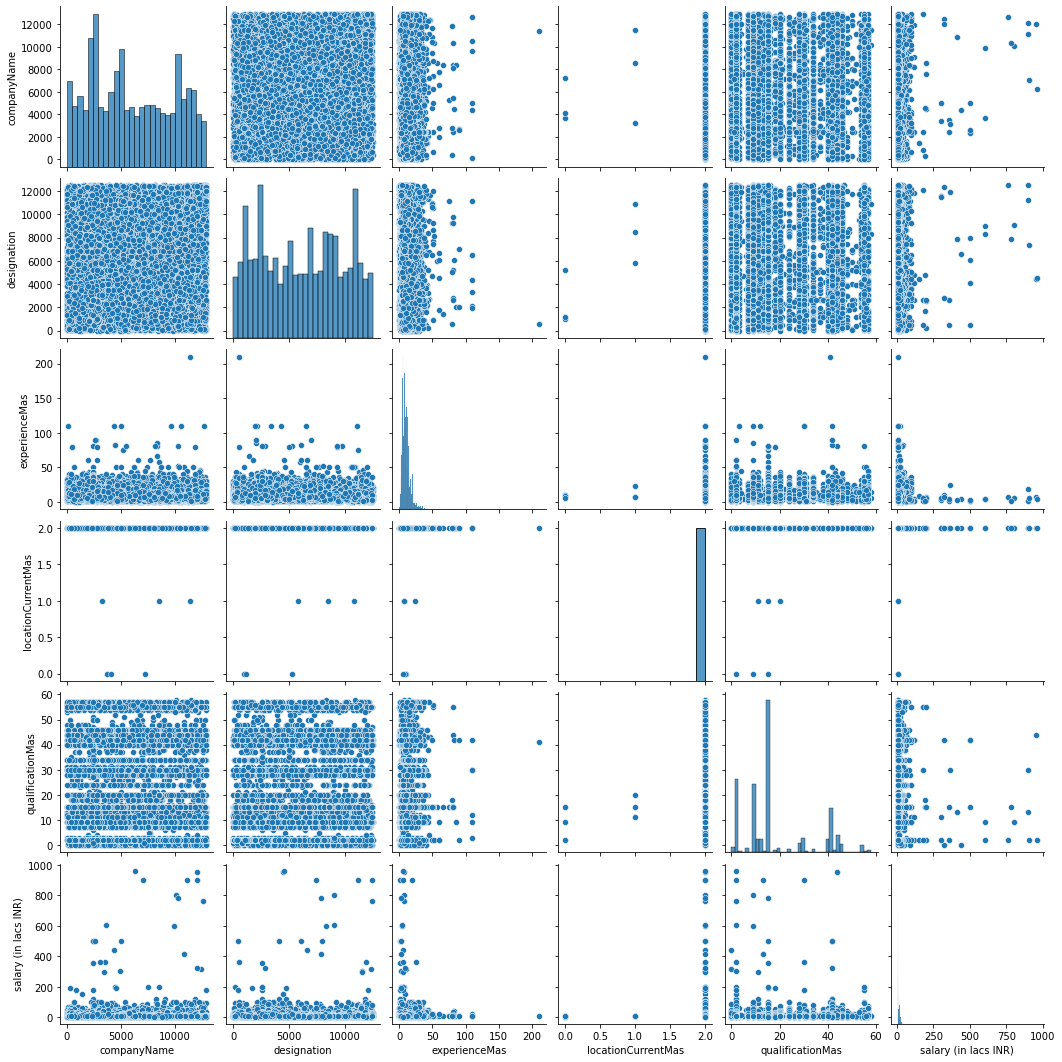

In [14]:
sns.pairplot(df1)

<AxesSubplot:>

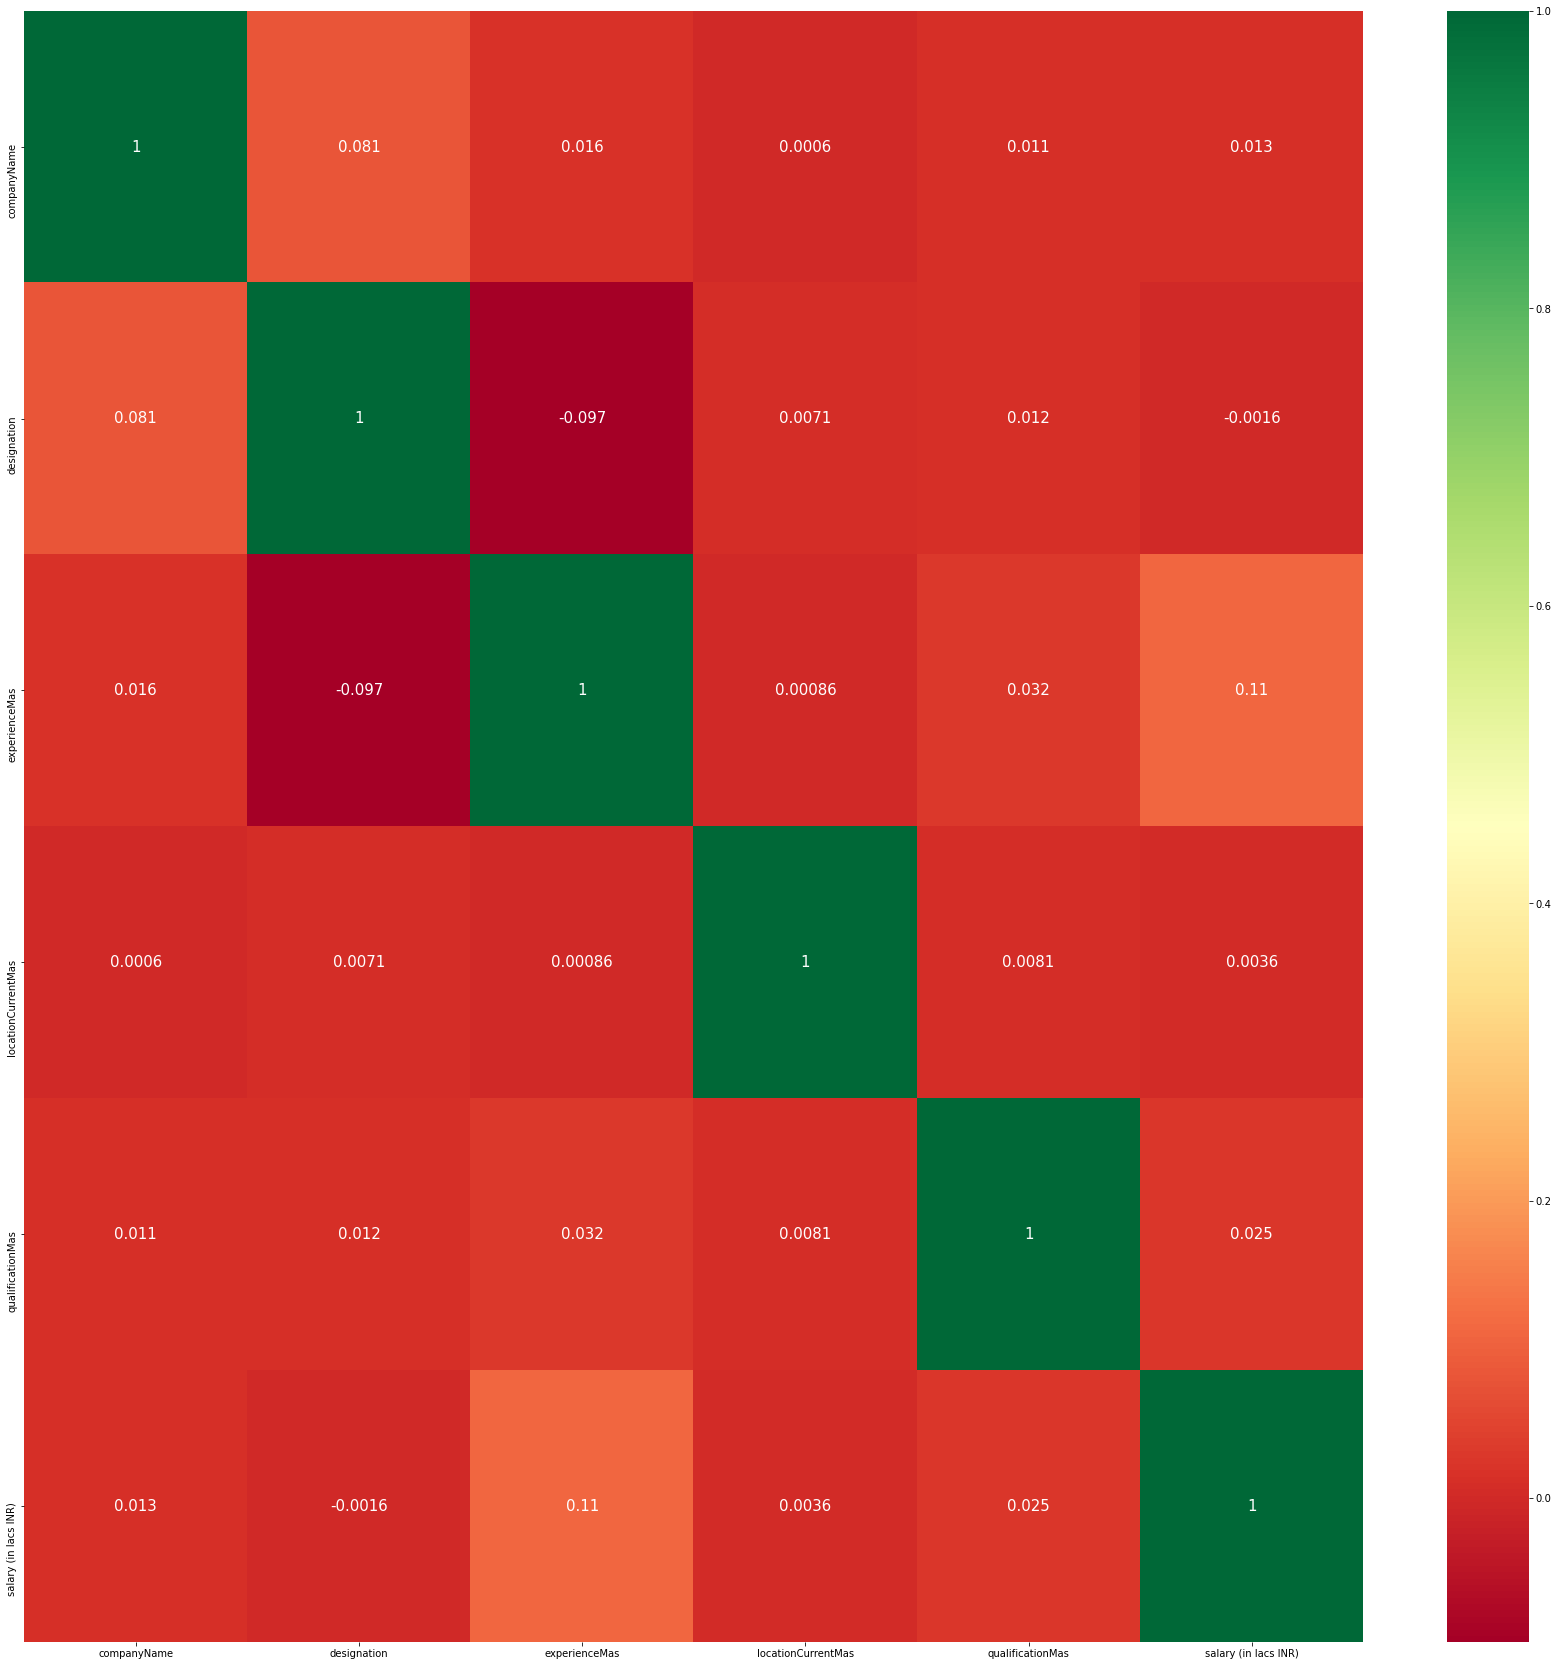

In [15]:
# correlation plot

plt.figure(figsize=(30, 30))
sns.heatmap(df1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

this shows that 'experienceMas' and 'salary' have the highest correlation, so these will be used for trainig our model

In [16]:
# scaling the data to so that the range is same for all columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df1[['companyName']])
df1['companyName'] = scaler.transform(df1[['companyName']])

scaler.fit(df[['designation']])
df1['designation'] = scaler.transform(df1[['designation']])

scaler.fit(df1[['experienceMas']])
df1['experienceMas'] = scaler.transform(df1[['experienceMas']])

scaler.fit(df1[['qualificationMas']])
df1['qualificationMas'] = scaler.transform(df1[['qualificationMas']])

scaler.fit(df1[['salary (in lacs INR)']])
df1['salary (in lacs INR)'] = scaler.transform(df1[['salary (in lacs INR)']])

Text(0, 0.5, 'salary (in lacs INR)')

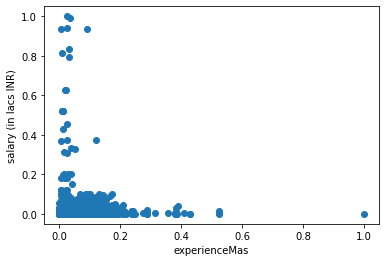

In [43]:
# scatterplot
plt.scatter(df1.experienceMas,df1['salary (in lacs INR)'])
plt.xlabel('experienceMas')
plt.ylabel('salary (in lacs INR)')

In [22]:
# fitting the data in kmeans clustering algorithm 

from sklearn.cluster import KMeans

sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['experienceMas','salary (in lacs INR)']])
    sse.append(km.inertia_)

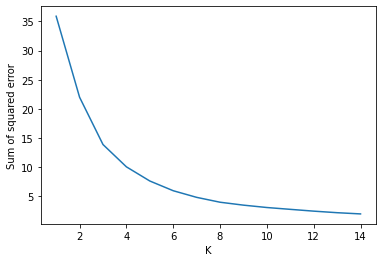

In [23]:
# using elbow method to predict the number of appropriate clusters we should use for the data

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

approximately we can see that the elbow indicates 7 or 8 would be the appropriate number of clusters

In [24]:
# training the data

km = KMeans(n_clusters=8)
y_predicted = km.fit_predict(df1[['experienceMas','salary (in lacs INR)']])
y_predicted

array([0, 0, 0, ..., 6, 0, 0])

In [29]:
df['cluster']=y_predicted
df1['cluster']=y_predicted
df1

,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,salary (in lacs INR),cluster
0,0.059773,0.741288,0.010000,2,0.258621,0.001791,0
1,0.020465,0.610054,0.028095,2,0.724138,0.000000,0
2,0.970731,0.855419,0.020952,2,0.034483,0.082723,0
4,0.147733,0.113171,0.032381,2,0.034483,0.003194,0
5,0.549849,0.798753,0.096190,2,0.982759,0.011518,1
...,...,...,...,...,...,...,...
28839,0.625222,0.544677,0.034762,2,0.258621,0.000000,6
28841,0.705151,0.798753,0.061905,2,0.155172,0.005330,2
28842,0.386053,0.225464,0.052381,2,0.034483,0.002094,6
28843,0.176925,0.934303,0.009524,2,0.258621,0.000230,0


we can see a new column named cluster is formed depicting the cluster to which a row belongs to.

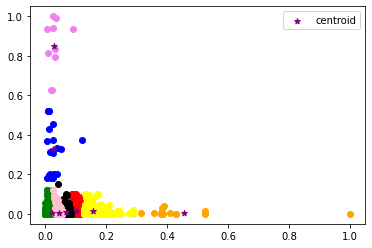

In [27]:
# scatter plotting our data with different color for different clusters

df0 = df1[df1.cluster==0]
df2 = df1[df1.cluster==1]
df3 = df1[df1.cluster==2]
df4 = df1[df1.cluster==3]
df5 = df1[df1.cluster==4]
df6 = df1[df1.cluster==5]
df7 = df1[df1.cluster==6]
df8 = df1[df1.cluster==7]

plt.scatter(df0.experienceMas,df0['salary (in lacs INR)'],color='green')
plt.scatter(df2.experienceMas,df2['salary (in lacs INR)'],color='red')
plt.scatter(df3.experienceMas,df3['salary (in lacs INR)'],color='black')
plt.scatter(df4.experienceMas,df4['salary (in lacs INR)'],color='yellow')
plt.scatter(df5.experienceMas,df5['salary (in lacs INR)'],color='violet')
plt.scatter(df6.experienceMas,df6['salary (in lacs INR)'],color='blue')
plt.scatter(df7.experienceMas,df7['salary (in lacs INR)'],color='pink')
plt.scatter(df8.experienceMas,df8['salary (in lacs INR)'],color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

apologies for the outlier here but i wasnt able to remove it due to some unresolvable error

In [32]:
# creating different dataframes for individual clusters and saving them as different csvs

cluster_0 = df.loc[df['cluster'] == 0, :]
cluster_1 = df.loc[df['cluster'] == 1, :]
cluster_2 = df.loc[df['cluster'] == 2, :]
cluster_3 = df.loc[df['cluster'] == 3, :]
cluster_4 = df.loc[df['cluster'] == 4, :]
cluster_5 = df.loc[df['cluster'] == 5, :]
cluster_6 = df.loc[df['cluster'] == 6, :]

In [42]:
cluster_0.to_csv('cluster_0.csv')
cluster_1.to_csv('cluster_1.csv')
cluster_2.to_csv('cluster_2.csv')
cluster_3.to_csv('cluster_3.csv')
cluster_4.to_csv('cluster_4.csv')
cluster_5.to_csv('cluster_5.csv')
cluster_6.to_csv('cluster_6.csv')

NOTE: At some points in the data preprocessing I have used excel as some things where more convinient to perform there.